# Producing and loading survey masks

It is never the case in optical and NIR imaging that data exists without any abnormalities; there are always regions where the output flux is not necessarily reliable. The primary culprits of these are image edges and stellar diffraction spikes, however there may well be other image artefacts present. Over the first few years of JWST/NIRCam operations, which observational astrophysics have been using extensively, these artefacts consist of wisps, claws, and snowballs which are not always properly accounted for in data reduction pipelines. For more information on these types of artefacts, please visit the official JWST user documentation following the hyperlinks for [wisps, claws](https://jwst-docs.stsci.edu/depreciated-jdox-articles/nircam-claws-and-wisps#gsc.tab=0), and [snowballs](https://jwst-docs.stsci.edu/depreciated-jdox-articles/data-artifacts-and-features/snowballs-and-shower-artifacts#gsc.tab=0). In the segmentation process, these artefacts may be picked up they can often be bright, however we choose to also mask these specific areas just to make sure.

Galfind utilizes two different masking methods which we will cover in the following examples. As usual, our first code block will be to instantiate our Data object with the JOF data.

In [1]:
from pathlib import Path
from copy import deepcopy
import shutil
import astropy.units as u
from galfind import Stacked_Band_Data, Data, config
from galfind.Data import morgan_version_to_dir
from galfind import useful_funcs_austind as funcs

survey = "JOF"
version = "v11"
instrument_names = ["NIRCam"]
aper_diams = [0.32, 0.5, 1.0, 1.5, 2.0] * u.arcsec
forced_phot_band = ["F277W", "F356W", "F444W"]

JOF_data = Data.from_survey_version(
    survey = survey,
    version = version,
    instrument_names = instrument_names, 
    version_to_dir_dict = morgan_version_to_dir,
    aper_diams = aper_diams,
    forced_phot_band = forced_phot_band,
)
JOF_data_2 = deepcopy(JOF_data)
JOF_data_3 = deepcopy(JOF_data)
JOF_data_4 = deepcopy(JOF_data)
JOF_data_5 = deepcopy(JOF_data)
JOF_data_6 = deepcopy(JOF_data)

Reading GALFIND config file from: /nvme/scratch/work/austind/GALFIND/galfind/../configs/galfind_config.ini


INFO:galfind:Aperture corrections for ACS_WFC loaded from /nvme/scratch/work/austind/GALFIND/galfind/Aperture_corrections/ACS_WFC_aper_corr.txt
INFO:galfind:Aperture corrections for WFC3_IR loaded from /nvme/scratch/work/austind/GALFIND/galfind/Aperture_corrections/WFC3_IR_aper_corr.txt
INFO:galfind:Aperture corrections for NIRCam loaded from /nvme/scratch/work/austind/GALFIND/galfind/Aperture_corrections/NIRCam_aper_corr.txt
INFO:galfind:Aperture corrections for MIRI loaded from /nvme/scratch/work/austind/GALFIND/galfind/Aperture_corrections/MIRI_aper_corr.txt
INFO:galfind:Aperture corrections for ACS_WFC loaded from /nvme/scratch/work/austind/GALFIND/galfind/Aperture_corrections/ACS_WFC_aper_corr.txt
INFO:galfind:Aperture corrections for WFC3_IR loaded from /nvme/scratch/work/austind/GALFIND/galfind/Aperture_corrections/WFC3_IR_aper_corr.txt
INFO:galfind:Aperture corrections for NIRCam loaded from /nvme/scratch/work/austind/GALFIND/galfind/Aperture_corrections/NIRCam_aper_corr.txt
IN

## Example 1: Manually masking the data

In this example, we will convert our pre-created .reg mask paths made in ds9 (or other image analysis package which produces an identical .reg output) to pixel masks using the `Data.mask()` method. We explicitly passing in `manual` as our preferred method. This requires masks to the relevant filters to be included in the following sub-directory:

In [2]:
print(f"{config['Masking']['MASK_DIR']}/{JOF_data.survey}/reg")

/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/reg


The internal code uses glob.glob to extract the required paths which contain the band name labelled in 1 of 4 ways. For example, the F444W filter could be written as either:
1. F444W (obviously)
2. f444w (lower case)
3. F444w (capitalized)
4. f444W (upper case with lowered F)
It is worth noting that including more than 1 mask path per filter in this directory will cause the code to crash.

The first thing the code will do post path extraction will be to 'clean' these mask paths for regions with zero size. This may sound a little odd but for certain versions of ds9 (don't ask me which as I don't know), it is possible to accidentally create these regions, which then cause the entire region to be masked. Obviously this is not the expected behaviour, and so to get rid of these explicit cleaning of these .reg files is required. Following cleaning, these .reg masks will be converted to a pixel mask on the same scale as the SCI/ERR/WHT imaging and saved as a .fits mask.

In [3]:
JOF_data.mask(method = "manual")

INFO:galfind:Combined mask for <galfind.Data.Stacked_Band_Data object at 0x7fcef92b02b0> already exists at /raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/combined/JOF_F277W+F356W+F444W_manual.fits


Let's have a look to see if we can find the newly created fits maps.

In [4]:
print(JOF_data.mask_paths)

for filt_name, path in JOF_data.mask_paths.items():
    if Path(path).is_file():
        print(f"{filt_name} mask exists")
    else:
        print(f"{filt_name} mask does not exist")

{'F090W': '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/manual/F090W_v11_manual.fits', 'F115W': '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/manual/F115W_v11_manual.fits', 'F150W': '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/manual/F150W_v11_manual.fits', 'F162M': '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/manual/F162M_v11_manual.fits', 'F182M': '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/manual/F182M_v11_manual.fits', 'F200W': '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/manual/F200W_v11_manual.fits', 'F210M': '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/manual/F210M_v11_manual.fits', 'F250M': '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/manual/F250M_v11_manual.fits', 'F277W': '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/manual/F277W_v11_manual.fits', 'F300M': '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/manual/F300M_v11_manual.fits', 'F335M': '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/manual/F335M_v11_manual.fits'

And also see how this impacts the print statement.

In [5]:
print(JOF_data)

****************************************
DATA OBJECT:
----------
SURVEY: JOF
VERSION: v11
****************************************
MULTIPLE_FILTER
----------
FACILITY: JWST
INSTRUMENT: NIRCam
FILTERS: ['F090W', 'F115W', 'F150W', 'F162M', 'F182M', 'F200W', 'F210M', 'F250M', 'F277W', 'F300M', 'F335M', 'F356W', 'F410M', 'F444W']
****************************************
****************************************



As with other examples we've seen, for example with the [segmentation maps](source_extraction.ipynb), attempting to load masks into an object which already contains them will not work. The original mask paths will remain. This is to prevent confusion with which masks have been used to create any products that require these mask paths, for example the band [depths](running_depths.ipynb).

In [6]:
JOF_data.mask(method = "auto")
print(JOF_data)

INFO:galfind:Combined mask for <galfind.Data.Stacked_Band_Data object at 0x7fcef92b02b0> already exists at /raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/combined/JOF_F277W+F356W+F444W_manual.fits


****************************************
DATA OBJECT:
----------
SURVEY: JOF
VERSION: v11
****************************************
MULTIPLE_FILTER
----------
FACILITY: JWST
INSTRUMENT: NIRCam
FILTERS: ['F090W', 'F115W', 'F150W', 'F162M', 'F182M', 'F200W', 'F210M', 'F250M', 'F277W', 'F300M', 'F335M', 'F356W', 'F410M', 'F444W']
****************************************
****************************************



## Example 2: Plotting the mask for a Stacked_Band_Data object

To be clear, the `Data.mask()` function we have used in example 1 loops through the stored `Band_Data` objects and individually masks each one of them. But what if we want to make a mask for a `Stacked_Band_Data` object? To have a look at this we'll instantiate a couple of fresh new JOF `Data` objects and produce a `Stacked_Band_Data` object for the F277W, F356W, and F444W filters commonly used for selection when performing forced photometry (as we will do in the notebook on [cataloguing the data](cataloguing_the_data.ipynb)).

In [7]:
LW_nircam_stack = Stacked_Band_Data.from_band_data_arr(
    [band_data for band_data in JOF_data_2["F277W+F356W+F444W"]])
print(LW_nircam_stack)

INFO:galfind:Loaded aper_diams=<Quantity [0.32, 0.5 , 1.  , 1.5 , 2.  ] arcsec> for F277W+F356W+F444W


In [8]:
LW_nircam_stack.mask(method = "manual")

INFO:galfind:Combined mask for <galfind.Data.Stacked_Band_Data object at 0x7fcfc02dbac0> already exists at /raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/combined/JOF_F277W+F356W+F444W_manual.fits


To conclude this example, we will plot the mask for the stacked data. We explicitly write the input arguments used by default here for clarity.

In [9]:
#LW_nircam_stack.plot(ext = "mask")

Above we have implemented the default mask plotting which is used for both `Band_Data` and `Stacked_Band_Data` objects. Let's have a peek at some of the plotting options which we can implement here.

## Example 3: Automated masking of the data

In [10]:
JOF_data_3.mask(method = "auto")

INFO:galfind:Combined mask for <galfind.Data.Stacked_Band_Data object at 0x7fcef92d8400> already exists at /raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/combined/JOF_F277W+F356W+F444W_auto.fits


Once again, let us have a look at the masks paths that have been produced here and plot the mask for the F444W filter.

****************************************
DATA OBJECT:
----------
SURVEY: JOF
VERSION: v11
****************************************
MULTIPLE_FILTER
----------
FACILITY: JWST
INSTRUMENT: NIRCam
FILTERS: ['F090W', 'F115W', 'F150W', 'F162M', 'F182M', 'F200W', 'F210M', 'F250M', 'F277W', 'F300M', 'F335M', 'F356W', 'F410M', 'F444W']
****************************************
****************************************



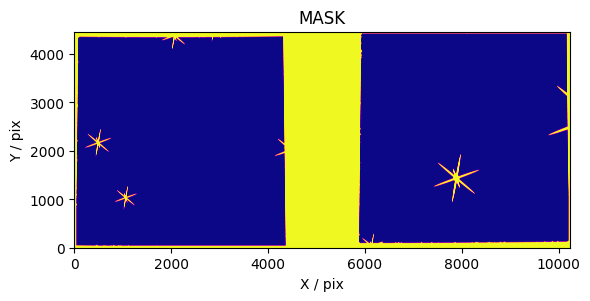

In [11]:
print(JOF_data_3)
JOF_data_3["F444W"].plot(ext = "mask", show = True)

There are plenty of arguments that can be passed into the `Data.mask` method which impact the automated masking process. These can either be passed in as:
1. A single value, which will then be used for all `Band_Data` objects within `Data`
2. A list of values with length equal to the length of the `Data` object, which will be passed to `Band_Data.mask` elementwise
3. A dict of {filt_name: value} containing all filter names in the `Data` object, which will be passed to `Band_Data.mask` explicitly by filter name

Below we explicitly produce dictionaries of the default values for each filter that are used in the masking process. These can be changed on a band-by-band basis for additional mask personalisation. 

In [12]:
default_star_mask_params = \
{
    "central": {"a": 300.0, "b": 4.25},
    "spikes": {"a": 400.0, "b": 4.5},
} 
star_mask_params_dict = {band_data.filt_name: default_star_mask_params for band_data in JOF_data_4}
edge_mask_distance_dict = {band_data.filt_name: 50 for band_data in JOF_data_4}
scale_extra_dict = {band_data.filt_name: 0.2 for band_data in JOF_data_4}
exclude_gaia_galaxies_dict = {band_data.filt_name: True for band_data in JOF_data_4}
angle_dict = {band_data.filt_name: -70.0 for band_data in JOF_data_4}
edge_value_dict = {band_data.filt_name: 0.0 for band_data in JOF_data_4}
element_dict = {band_data.filt_name: "ELLIPSE" for band_data in JOF_data_4}
gaia_row_lim_dict = {band_data.filt_name: 500 for band_data in JOF_data_4}
overwrite_dict = {band_data.filt_name: False for band_data in JOF_data_4}

JOF_data_4.mask(
    "auto", 
    star_mask_params = star_mask_params_dict, 
    edge_mask_distance = edge_mask_distance_dict, 
    scale_extra = scale_extra_dict, 
    exclude_gaia_galaxies = exclude_gaia_galaxies_dict, 
    angle = angle_dict, 
    edge_value = edge_value_dict, 
    element = element_dict, 
    gaia_row_lim = gaia_row_lim_dict, 
    overwrite = overwrite_dict
)

INFO:galfind:Combined mask for <galfind.Data.Stacked_Band_Data object at 0x7fce5d2c8f10> already exists at /raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/combined/JOF_F277W+F356W+F444W_auto.fits


We can see that the second time these masks are made automatically is much faster since they are simply loaded from the masks produced from the `JOF_data_3` object. Let us now check that these two implementations are the same.

In [13]:
if JOF_data_3 == JOF_data_4:
    print("Data objects are the same")
else:
    print("Data objects are different")

Data objects are the same


Since this metadata does not change the path that the mask for each band is saved in, should we attempt to load in the mask again using a different set of input parameters, the previously created mask will be loaded in instead of the one that would be implemented using the input arguments. Should you wish to overwrite the mask with the new implementation, you must pass `overwrite=True` into the `Data.mask` method. In either case, the saved mask arguments will match those that were used to create the mask the object points at if the ones the user inputs are different.

As an example of this, we will change the `edge_mask_distance` for the F444W band and reload the mask for a previously unmasked JOF `Data` object. When masking the JOF_data_4 object, the code populated the dictionary value for the F277W+F356W+F444W stacked band, although this becomes an issue when attempting to update one or more of the automasking parameters in one of the bands used for stacking. We therefore explicitly include F277W+F356W+F444W into our dictionary below

In [14]:
edge_mask_distance_dict = {**{band_data.filt_name: 50 if band_data.filt_name != "F444W" else 100 for band_data in JOF_data_5}, **{"F277W+F356W+F444W": 50}}
JOF_data_5.mask(
    "auto", 
    star_mask_params = star_mask_params_dict, 
    edge_mask_distance = edge_mask_distance_dict, 
    scale_extra = scale_extra_dict, 
    exclude_gaia_galaxies = exclude_gaia_galaxies_dict, 
    angle = angle_dict, 
    edge_value = edge_value_dict, 
    element = element_dict, 
    gaia_row_lim = gaia_row_lim_dict, 
    overwrite = False
)
if JOF_data_5["F444W"].mask_args["edge_mask_distance"] == edge_mask_distance_dict["F444W"]:
    print(f"{JOF_data_5['F444W'].mask_args['edge_mask_distance']} = {edge_mask_distance_dict['F444W']}")
else:
    print(f"{JOF_data_5['F444W'].mask_args['edge_mask_distance']} != {edge_mask_distance_dict['F444W']}")

INFO:galfind:Combined mask for <galfind.Data.Stacked_Band_Data object at 0x7fcef92bfd00> already exists at /raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/combined/JOF_F277W+F356W+F444W_auto.fits


50 != 100


We can see that the saved mask arguments are not the same as those input by the user since the mask has not been made using the user inputs.

## Example 4: Loading fits masks directly

In this final masking example, instead of producing the masks by using the `method = "auto"` or `method = "manual"` arguments, we will explicitly load them using the `fits_mask_path` argument. This is useful if you have masks saved in other locations outside of the `GALFIND_WORK` directory set in the config file. We will first copy our manually created masks from the default paths into a directory one step up from `GALFIND_WORK` and rename them for the sake of it.

In [15]:
# create directory for new masks
print(JOF_data_5.forced_phot_band.mask_path)
new_dir = f"{config['DEFAULT']['GALFIND_WORK']}/new_masks"
new_mask_paths = {**{band_data.filt_name: 
    f"{new_dir}/confusing_name_{str(i + 1)}.fits"
    for i, band_data in enumerate(JOF_data_5)}, 
    JOF_data_5.forced_phot_band.filt_name: 
    f"{new_dir}/confusing_name_{str(len(JOF_data_5) + 1)}.fits"}
funcs.make_dirs(list(new_mask_paths.values())[0])
# recursively copy masks across to new directory
print(JOF_data_5.mask_paths.values(), new_mask_paths.values())
[shutil.copyfile(src, dst) for src, dst in zip(JOF_data_5.mask_paths.values(), new_mask_paths.values())]

/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/combined/JOF_F277W+F356W+F444W_auto.fits
dict_values(['/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/auto/F090W_auto.fits', '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/auto/F115W_auto.fits', '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/auto/F150W_auto.fits', '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/auto/F162M_auto.fits', '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/auto/F182M_auto.fits', '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/auto/F200W_auto.fits', '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/auto/F210M_auto.fits', '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/auto/F250M_auto.fits', '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/auto/F277W_auto.fits', '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/auto/F300M_auto.fits', '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/auto/F335M_auto.fits', '/raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/auto/F356W_auto.fits', '/raid/s

['/raid/scratch/work/austind/GALFIND_WORK/new_masks/confusing_name_1.fits',
 '/raid/scratch/work/austind/GALFIND_WORK/new_masks/confusing_name_2.fits',
 '/raid/scratch/work/austind/GALFIND_WORK/new_masks/confusing_name_3.fits',
 '/raid/scratch/work/austind/GALFIND_WORK/new_masks/confusing_name_4.fits',
 '/raid/scratch/work/austind/GALFIND_WORK/new_masks/confusing_name_5.fits',
 '/raid/scratch/work/austind/GALFIND_WORK/new_masks/confusing_name_6.fits',
 '/raid/scratch/work/austind/GALFIND_WORK/new_masks/confusing_name_7.fits',
 '/raid/scratch/work/austind/GALFIND_WORK/new_masks/confusing_name_8.fits',
 '/raid/scratch/work/austind/GALFIND_WORK/new_masks/confusing_name_9.fits',
 '/raid/scratch/work/austind/GALFIND_WORK/new_masks/confusing_name_10.fits',
 '/raid/scratch/work/austind/GALFIND_WORK/new_masks/confusing_name_11.fits',
 '/raid/scratch/work/austind/GALFIND_WORK/new_masks/confusing_name_12.fits',
 '/raid/scratch/work/austind/GALFIND_WORK/new_masks/confusing_name_13.fits',
 '/raid/

Now we shall load them into our `Data` object using `Data.mask()` as before.

In [16]:
JOF_data_6.mask(fits_mask_path = new_mask_paths)
print(JOF_data_6)

INFO:galfind:Combined mask for <galfind.Data.Stacked_Band_Data object at 0x7fcef92d3bb0> already exists at /raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/combined/JOF_F277W+F356W+F444W_auto.fits


****************************************
DATA OBJECT:
----------
SURVEY: JOF
VERSION: v11
****************************************
MULTIPLE_FILTER
----------
FACILITY: JWST
INSTRUMENT: NIRCam
FILTERS: ['F090W', 'F115W', 'F150W', 'F162M', 'F182M', 'F200W', 'F210M', 'F250M', 'F277W', 'F300M', 'F335M', 'F356W', 'F410M', 'F444W']
****************************************
****************************************



Here we can see that the paths to our masks match the confusingly named paths set previously. Let's now delete the copied directory to clean up what we have done in this example.

In [17]:
shutil.rmtree(new_dir)